In [1]:
import os
from os.path import join
import sys
import pandas as pd
import numpy as np
import pickle as pkl
sys.path.append('/n/home12/binxuwang/Github/DiffusionReasoning')

In [2]:
from eval_memorization_utils import eval_memorization_all_level_sample_tsr, get_RAVEN_dataset, extract_row_mat_set, extract_panel_mat_set, extract_attr_row_mat_set, extract_attr_panel_mat_set, \
    compute_memorization_tab_through_training, visualize_memorization_dynamics, visualize_memorization_with_ctrl_dynamics, compute_memorization_binary_joint, extract_training_set_row_panel_sets
from posthoc_analysis_utils import sweep_collect_sample, sweep_collect_eval_data, extract_rule_list_from_eval_col, format_rule_list_to_mat, extract_and_convert
from stats_plot_utils import estimate_CI, shaded_error, saveallforms, shaded_error, add_rectangles

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
def visualize_memorization_with_ctrl_dynamics(mem_stats_df, mem_stats_ctrl_df, expname=''):
    figh, axs = plt.subplots(1, 2, figsize=(10, 6))
    plt.sca(axs[0])
    sns.lineplot(data=mem_stats_df, x="epoch", y="mem_rowfrac", label="full row")   
    sns.lineplot(data=mem_stats_df, x="epoch", y="mem_attr0_rowfrac", label="row attr0")
    sns.lineplot(data=mem_stats_df, x="epoch", y="mem_attr1_rowfrac", label="row attr1")
    sns.lineplot(data=mem_stats_df, x="epoch", y="mem_attr2_rowfrac", label="row attr2")
    sns.lineplot(data=mem_stats_df, x="epoch", y="mem_samplefrac", label="full sample")
    sns.lineplot(data=mem_stats_ctrl_df, x="epoch", y="mem_rowfrac", label="full row (ctrl)", linestyle=':', color="C0")
    sns.lineplot(data=mem_stats_ctrl_df, x="epoch", y="mem_attr0_rowfrac", label="row attr0 (ctrl)", linestyle=':', color="C1")
    sns.lineplot(data=mem_stats_ctrl_df, x="epoch", y="mem_attr1_rowfrac", label="row attr1 (ctrl)", linestyle=':', color="C2")
    sns.lineplot(data=mem_stats_ctrl_df, x="epoch", y="mem_attr2_rowfrac", label="row attr2 (ctrl)", linestyle=':', color="C3")
    sns.lineplot(data=mem_stats_ctrl_df, x="epoch", y="mem_samplefrac", label="ctrl sample (ctrl)", linestyle=':', color="C4")
    plt.title("Row memorization fraction")
    plt.ylabel("row fraction")
    plt.xlabel("step")
    plt.legend()
    plt.sca(axs[1])
    sns.lineplot(data=mem_stats_df, x="epoch", y="mem_panfrac", label="full panel")
    sns.lineplot(data=mem_stats_df, x="epoch", y="mem_attr0_panfrac", label="panel attr0")
    sns.lineplot(data=mem_stats_df, x="epoch", y="mem_attr1_panfrac", label="panel attr1")
    sns.lineplot(data=mem_stats_df, x="epoch", y="mem_attr2_panfrac", label="panel attr2")
    sns.lineplot(data=mem_stats_ctrl_df, x="epoch", y="mem_panfrac", label="full panel (ctrl)", linestyle=':', color="C0")
    sns.lineplot(data=mem_stats_ctrl_df, x="epoch", y="mem_attr0_panfrac", label="panel attr0 (ctrl)", linestyle=':', color="C1")
    sns.lineplot(data=mem_stats_ctrl_df, x="epoch", y="mem_attr1_panfrac", label="panel attr1 (ctrl)", linestyle=':', color="C2")
    sns.lineplot(data=mem_stats_ctrl_df, x="epoch", y="mem_attr2_panfrac", label="panel attr2 (ctrl)", linestyle=':', color="C3")
    plt.title("Panel memorization fraction")
    plt.ylabel("panel fraction")
    plt.xlabel("step")
    plt.legend()
    plt.suptitle(f"Memorization of training set at various level\n{expname}")
    # saveallforms(figexpdir, "memorization_levels_dynamics", figh)
    plt.show()
    return figh

## GPT memorization

In [11]:
memroot = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Figures/DiffusionReasoning/Figure_memorization_inspection"
GPTmemroot = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Figures/DiffusionReasoning/memorization_dynamics"

GPT2_base_RAVEN_uncond_heldout0_stream0_16M-20240820-024013 Read /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Figures/DiffusionReasoning/memorization_dynamics/GPT2_base_RAVEN_uncond_heldout0_stream0_16M-20240820-024013/memorization_stats_train_set.csv with 401 rows.


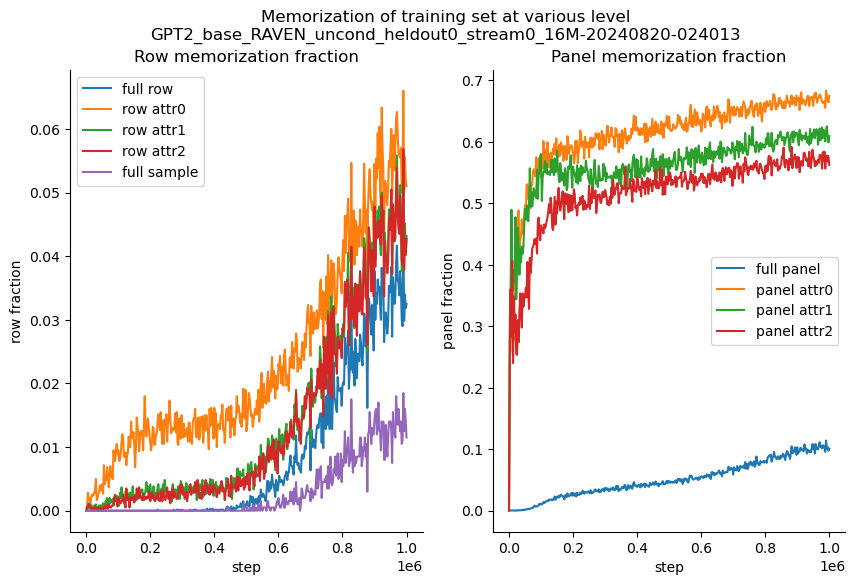

GPT2_small_RAVEN_uncond_heldout0_stream0_016M-20240820-024539 Read /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Figures/DiffusionReasoning/memorization_dynamics/GPT2_small_RAVEN_uncond_heldout0_stream0_016M-20240820-024539/memorization_stats_train_set.csv with 401 rows.


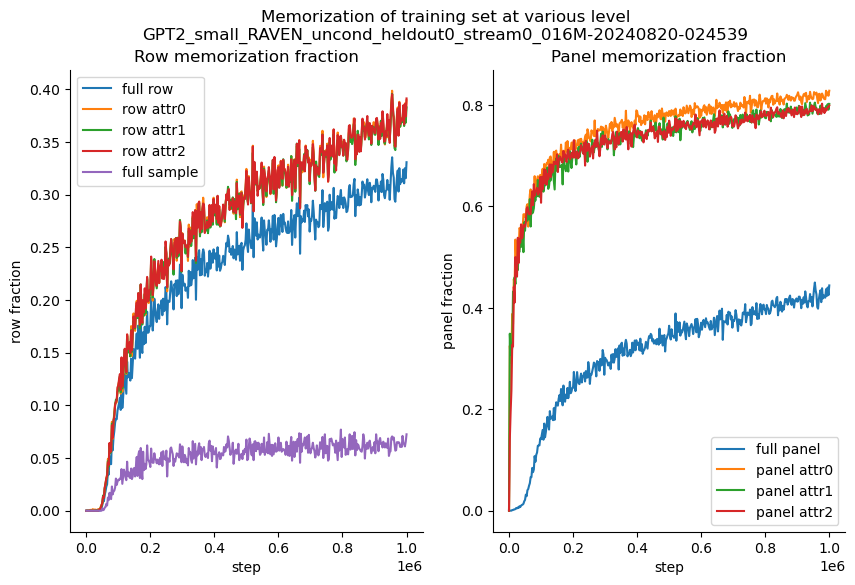

GPT2_medium_RAVEN_uncond_heldout0_stream0_16M-20240820-024019 Read /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Figures/DiffusionReasoning/memorization_dynamics/GPT2_medium_RAVEN_uncond_heldout0_stream0_16M-20240820-024019/memorization_stats_train_set.csv with 401 rows.


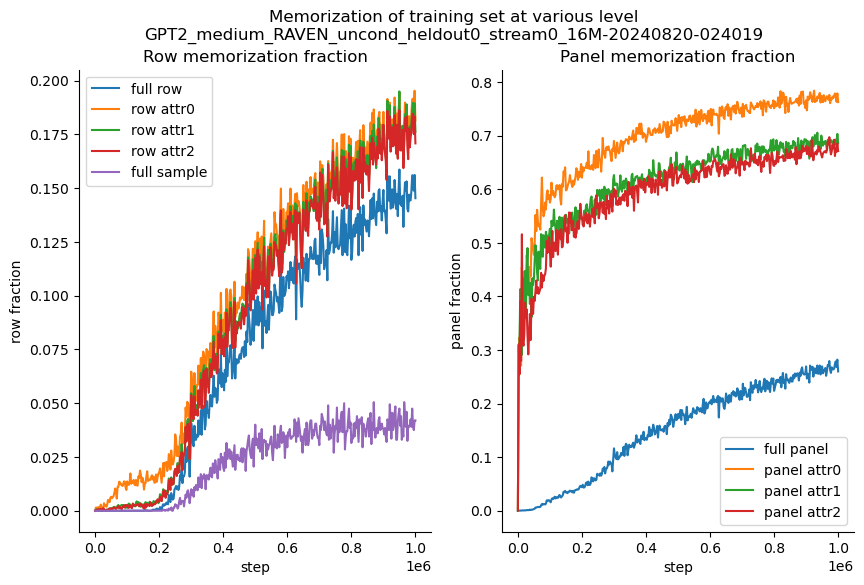

GPT2_base_RAVEN_uncond_heldout0_stream1_6M-20240820-023925 Read /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Figures/DiffusionReasoning/memorization_dynamics/GPT2_base_RAVEN_uncond_heldout0_stream1_6M-20240820-023925/memorization_stats_train_set.csv with 401 rows.


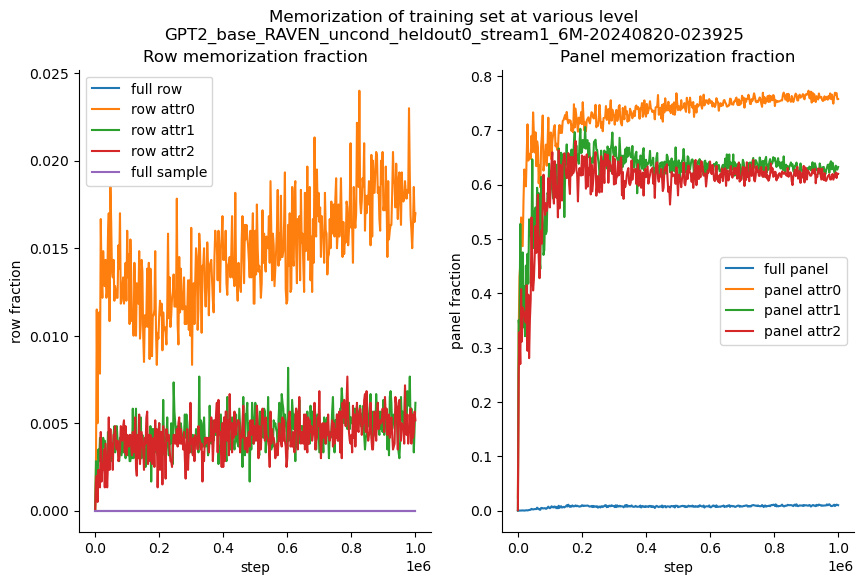

GPT2_small_RAVEN_uncond_heldout0_stream1_6M-20240818-013943 Read /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Figures/DiffusionReasoning/memorization_dynamics/GPT2_small_RAVEN_uncond_heldout0_stream1_6M-20240818-013943/memorization_stats_train_set.csv with 401 rows.


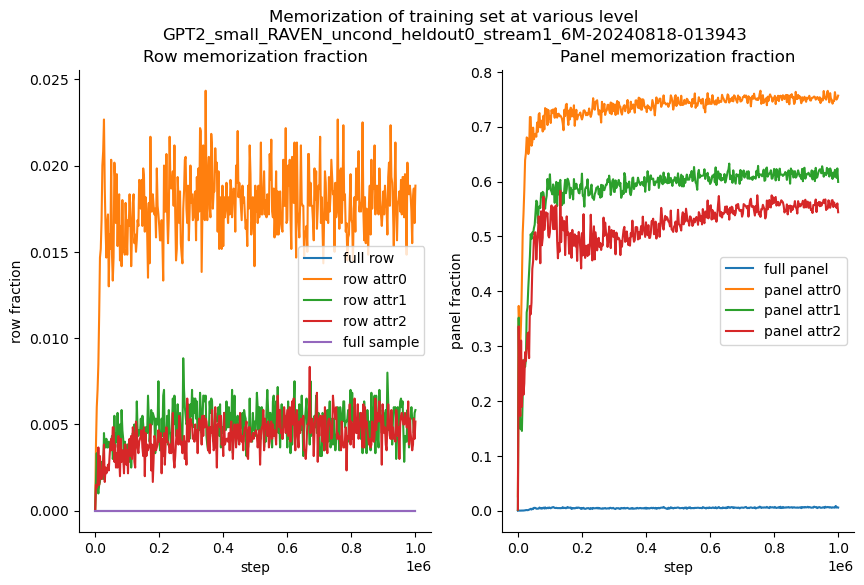

GPT2_medium_RAVEN_uncond_heldout0_stream0_016M-20240820-024735 Read /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Figures/DiffusionReasoning/memorization_dynamics/GPT2_medium_RAVEN_uncond_heldout0_stream0_016M-20240820-024735/memorization_stats_train_set.csv with 401 rows.


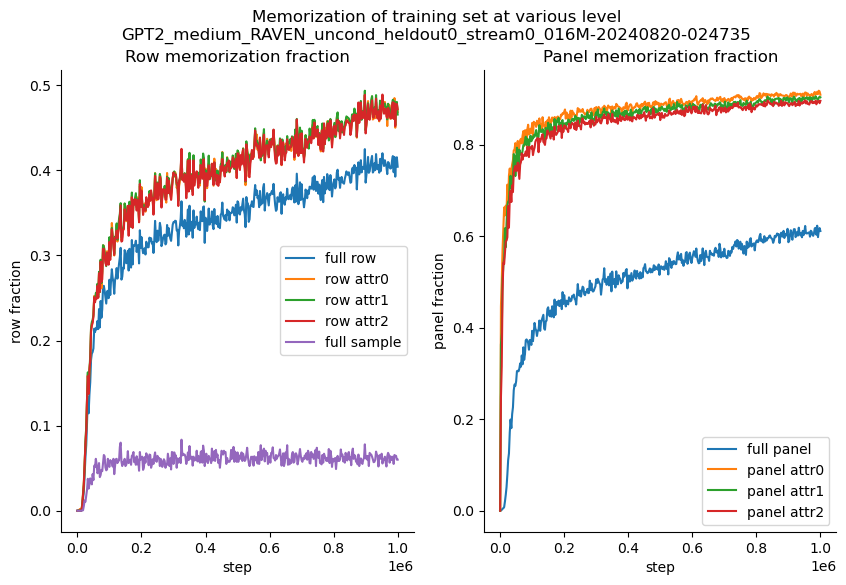

GPT2_base_RAVEN_uncond_heldout0_stream0_016M-20240820-023934 Read /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Figures/DiffusionReasoning/memorization_dynamics/GPT2_base_RAVEN_uncond_heldout0_stream0_016M-20240820-023934/memorization_stats_train_set.csv with 401 rows.


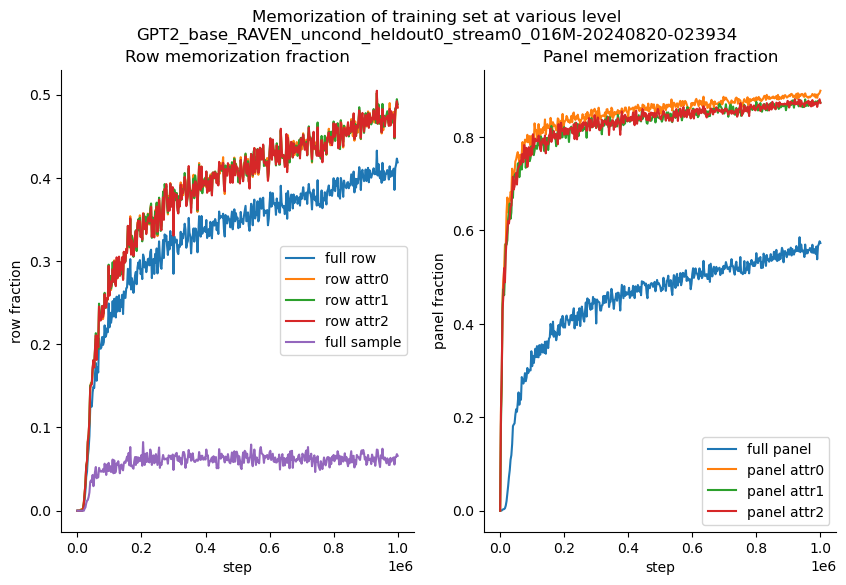

GPT2_medium_RAVEN_uncond_heldout0_stream1_6M-20240820-023917 Read /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Figures/DiffusionReasoning/memorization_dynamics/GPT2_medium_RAVEN_uncond_heldout0_stream1_6M-20240820-023917/memorization_stats_train_set.csv with 401 rows.


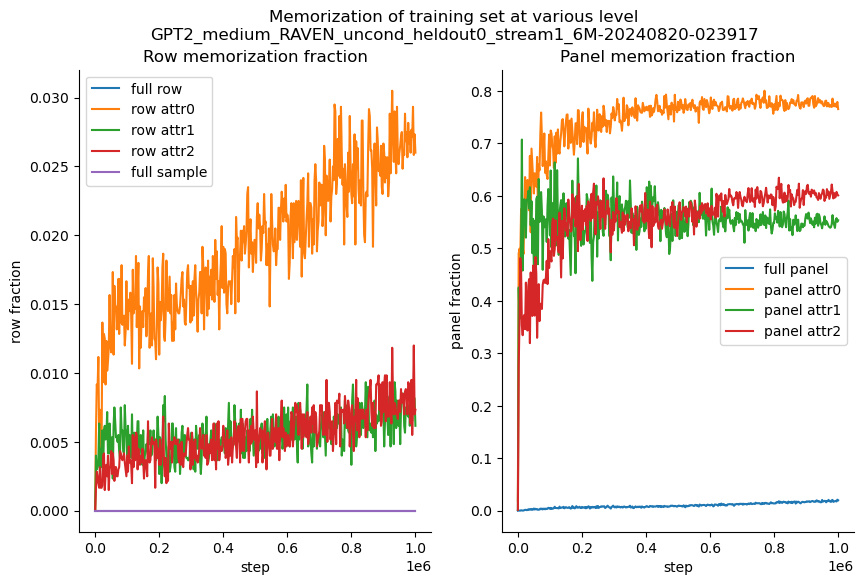

GPT2_small_RAVEN_uncond_heldout0_stream0_16M-20240820-024128 Read /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Figures/DiffusionReasoning/memorization_dynamics/GPT2_small_RAVEN_uncond_heldout0_stream0_16M-20240820-024128/memorization_stats_train_set.csv with 401 rows.


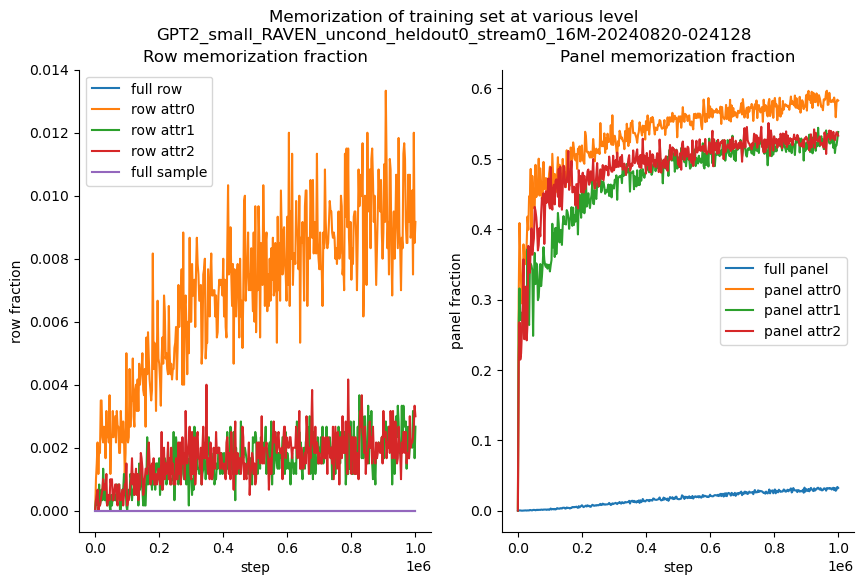

In [12]:

# Define the root directory
# Iterate through all subdirectories and files
for figexpdir, _, files in os.walk(GPTmemroot):
    # Get the experiment name
    expname = os.path.basename(figexpdir)
    for file in files:
        if file.endswith('train_set.csv'):
            file_path = os.path.join(figexpdir, file)
            # Read the CSV file
            mem_stats_df = pd.read_csv(file_path)
            # Process the data as needed
            print(f"{expname} Read {file_path} with {len(mem_stats_df)} rows.")
            figh = visualize_memorization_dynamics(mem_stats_df, expname=expname)
            saveallforms(figexpdir, "memorization_dynamics_train_set", figh)

### memorization with control 

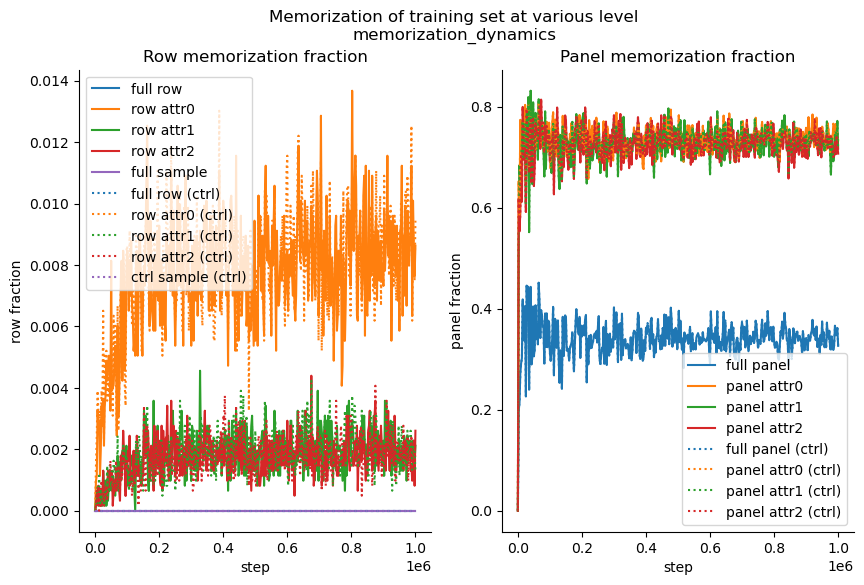

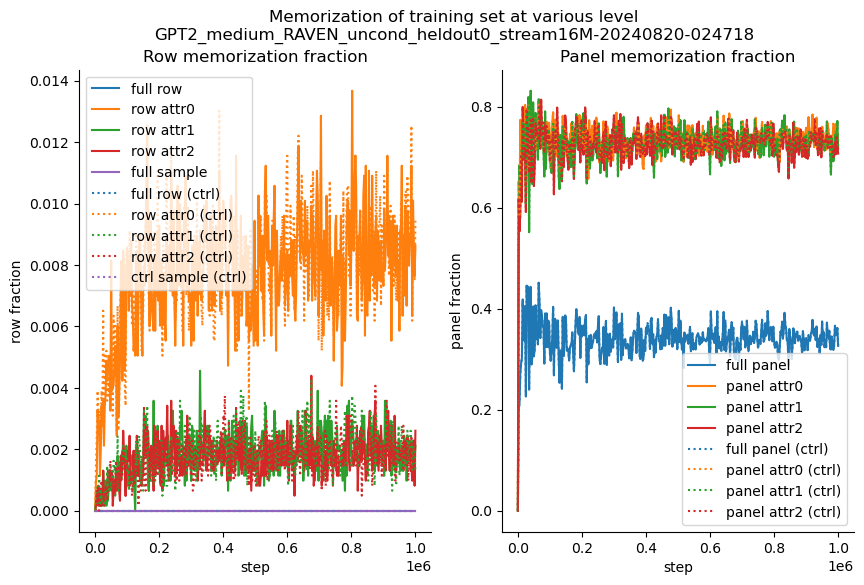

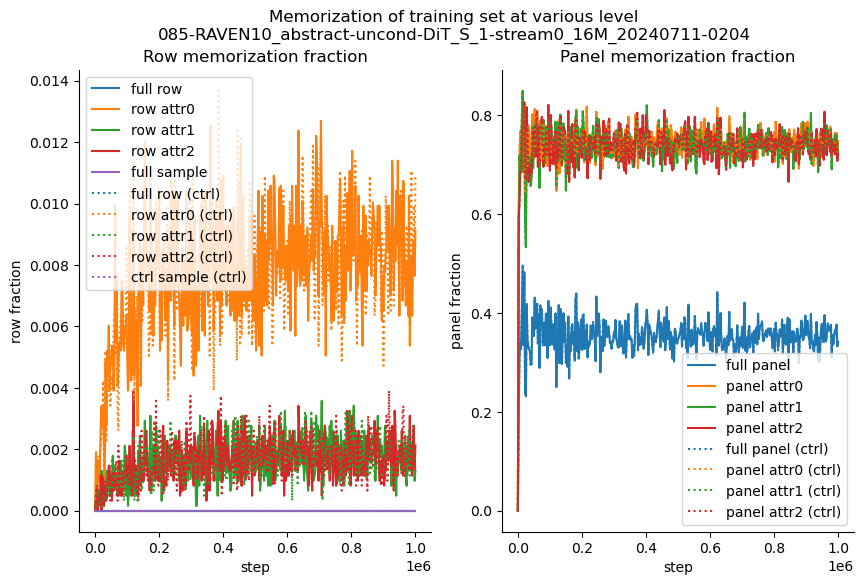

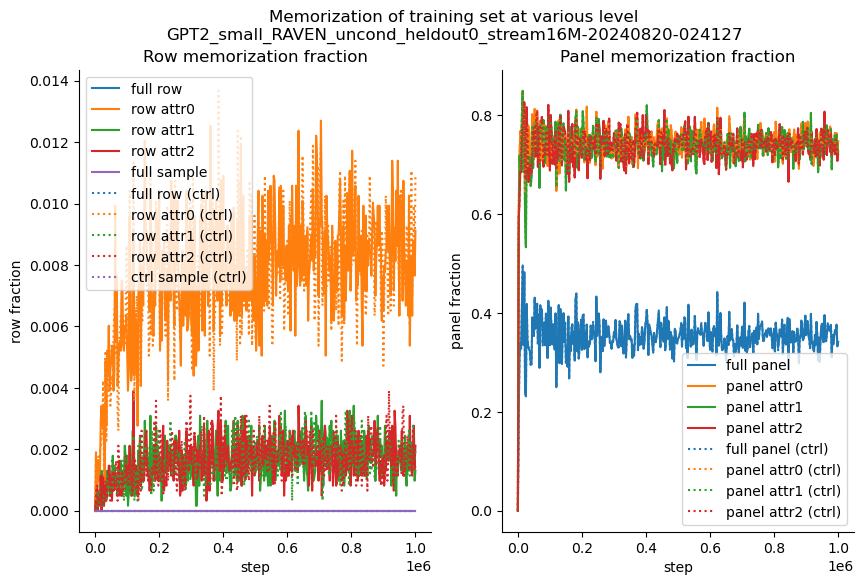

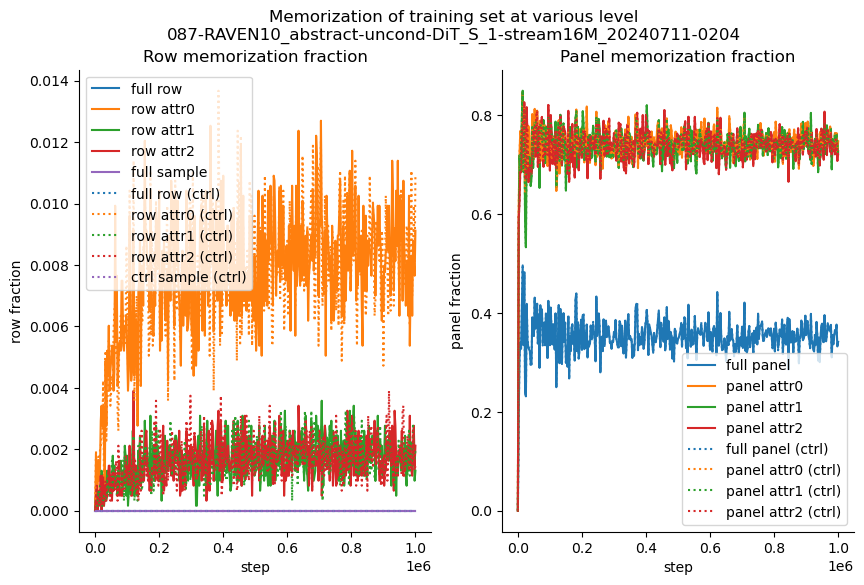

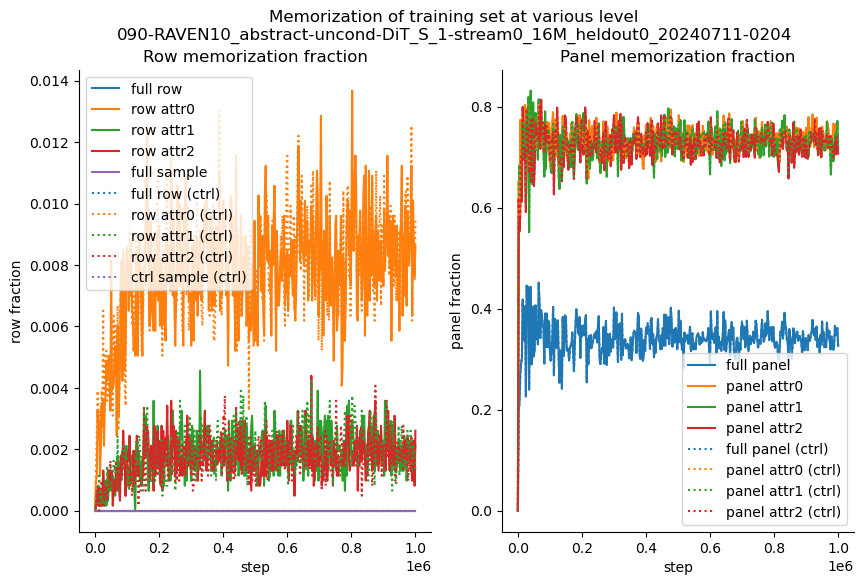

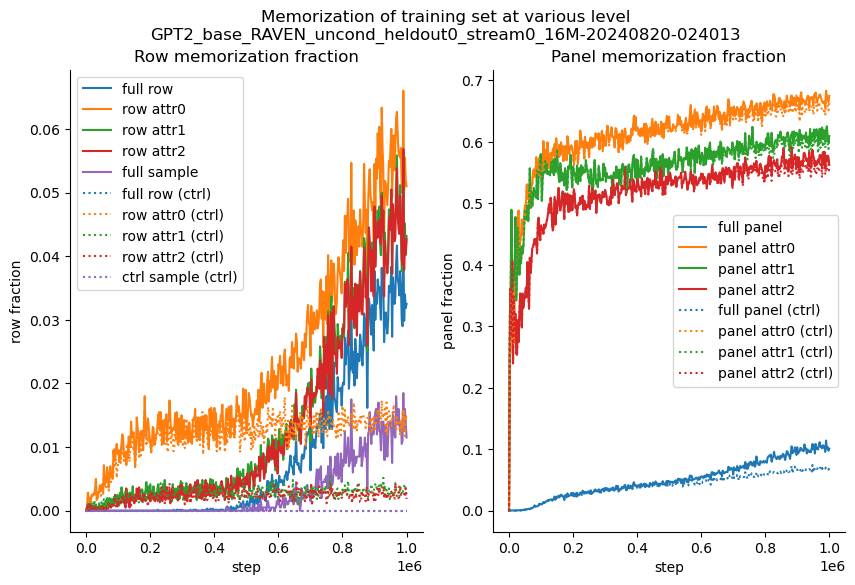

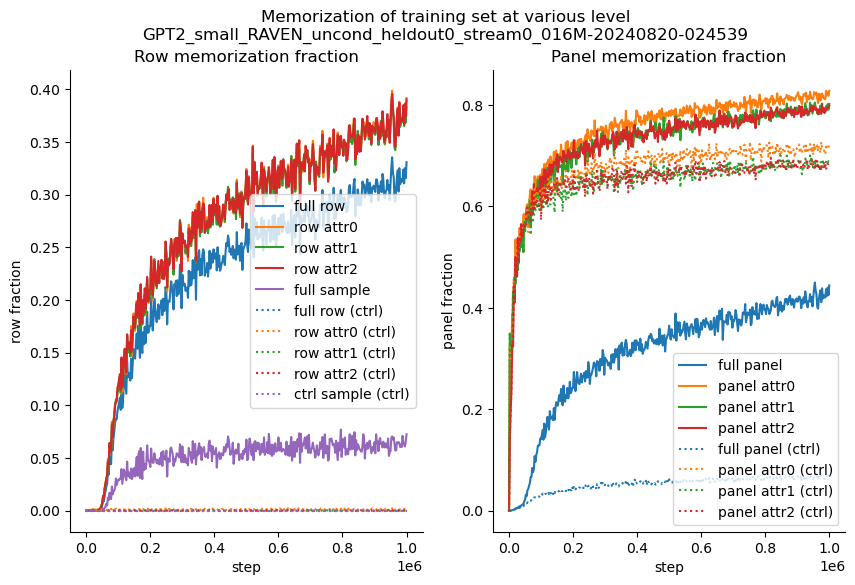

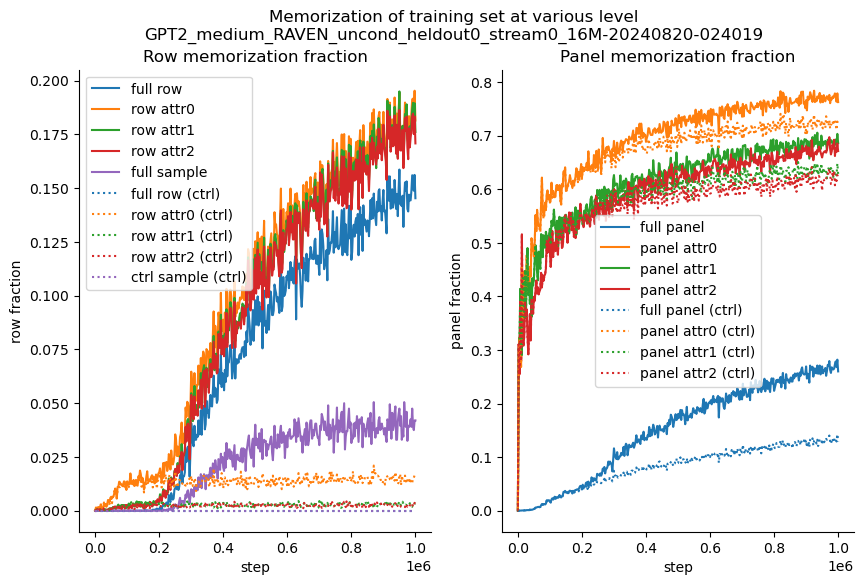

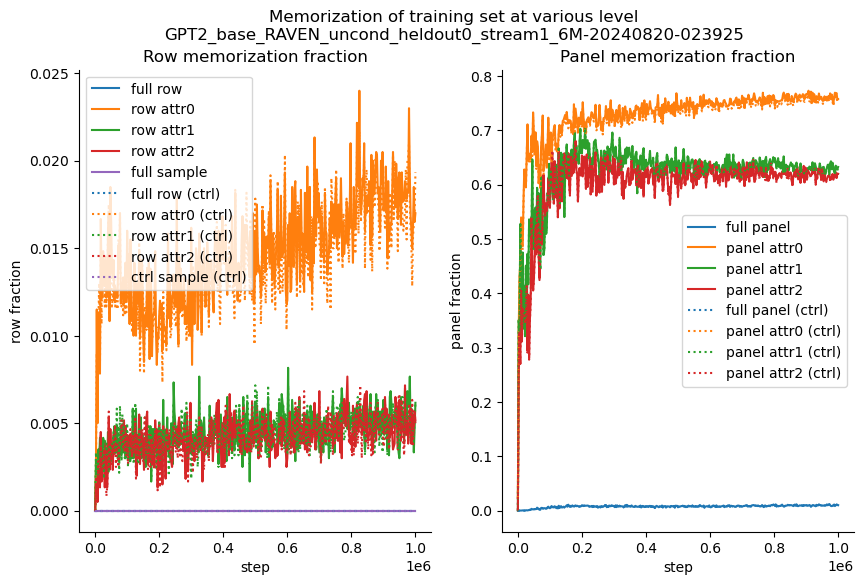

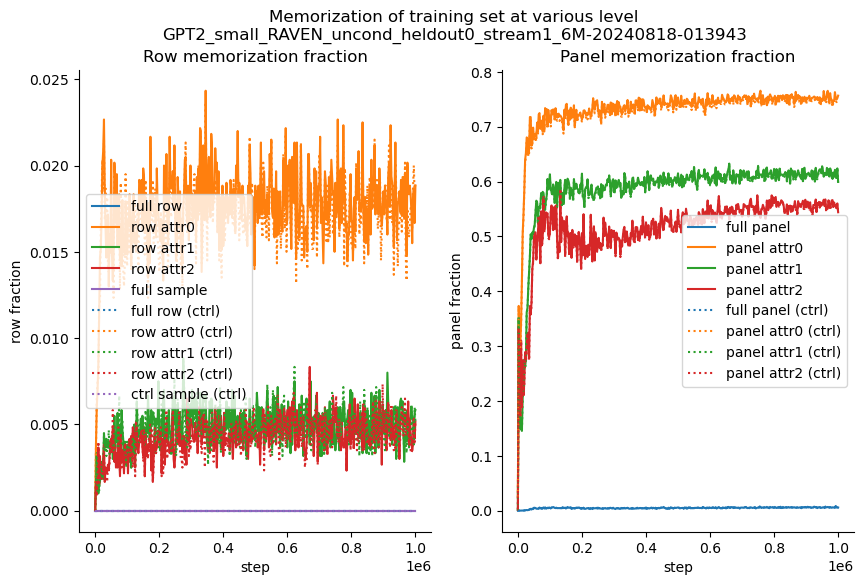

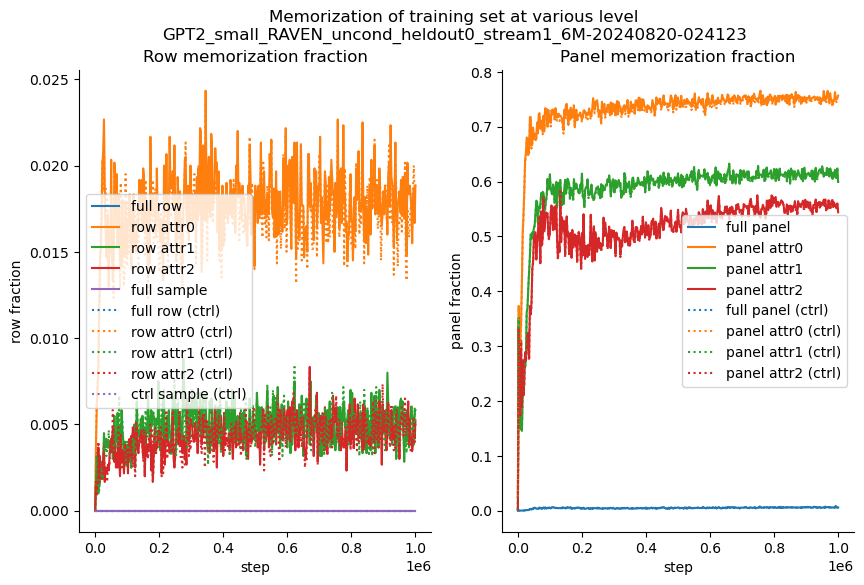

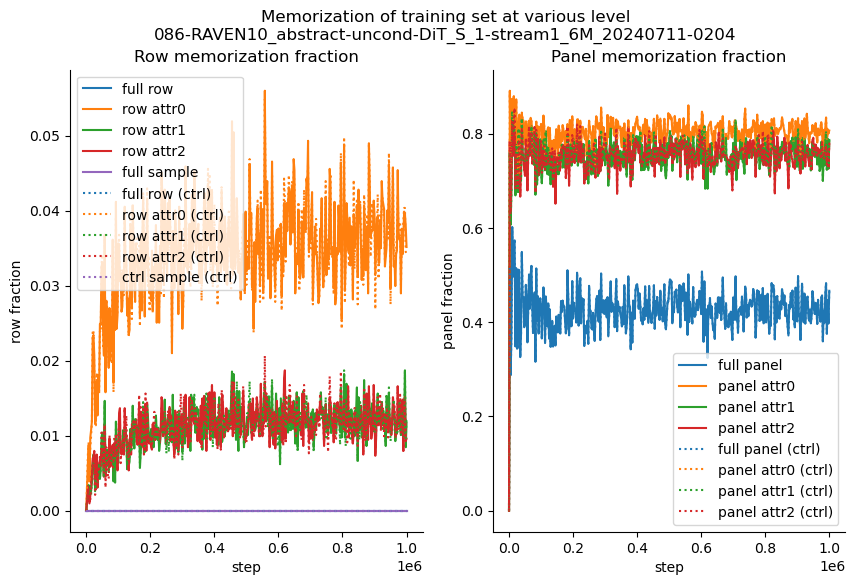

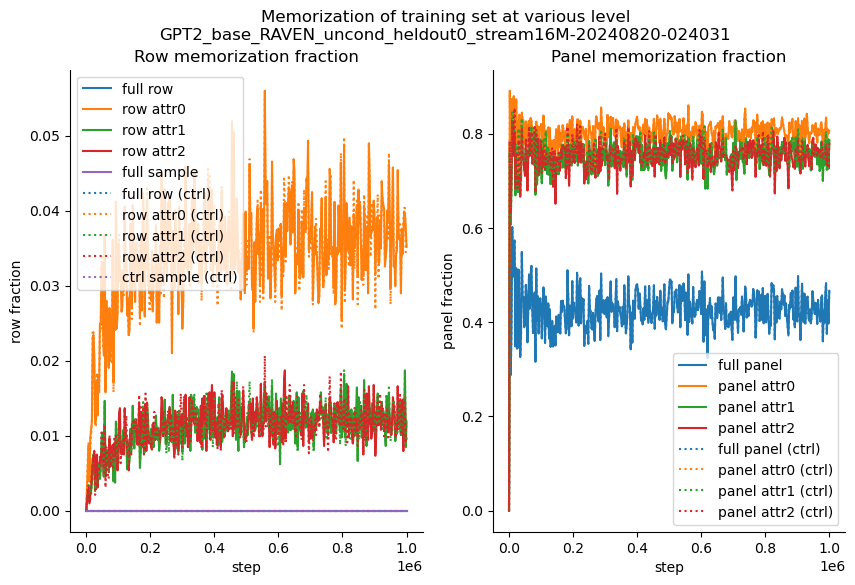

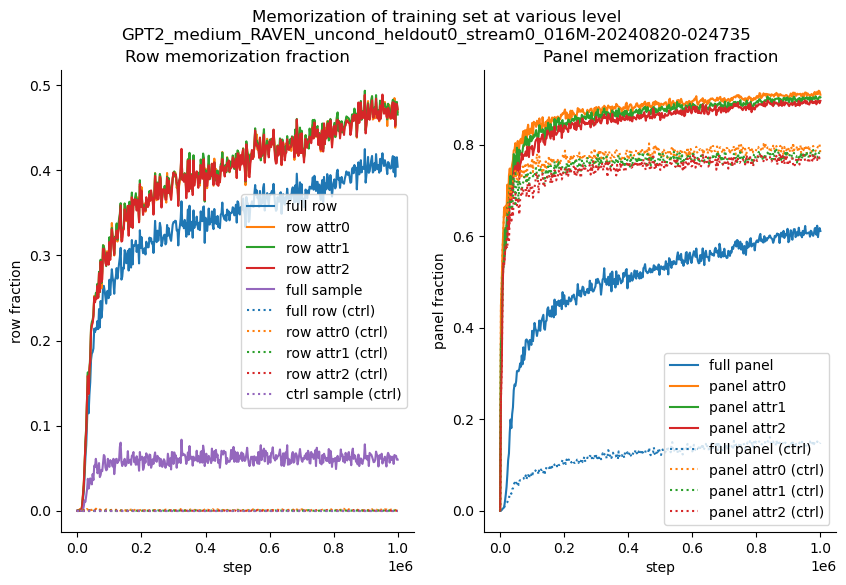

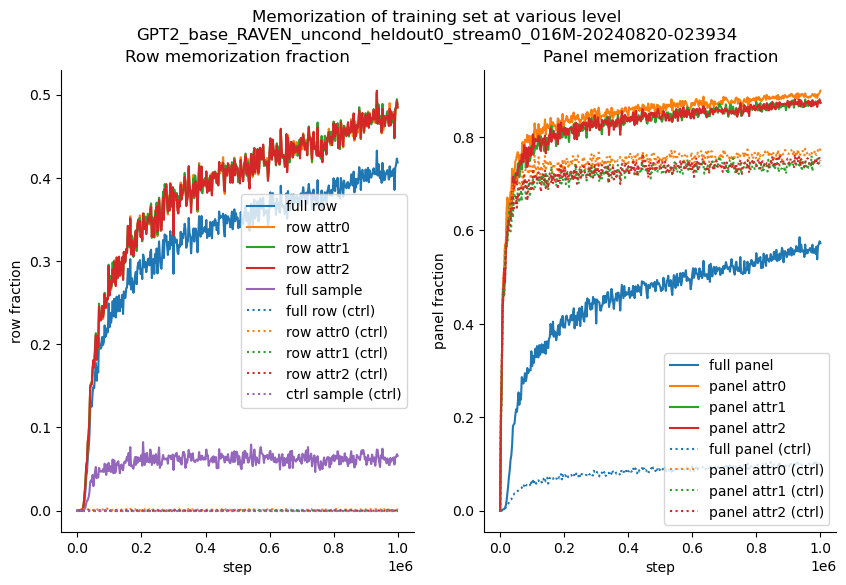

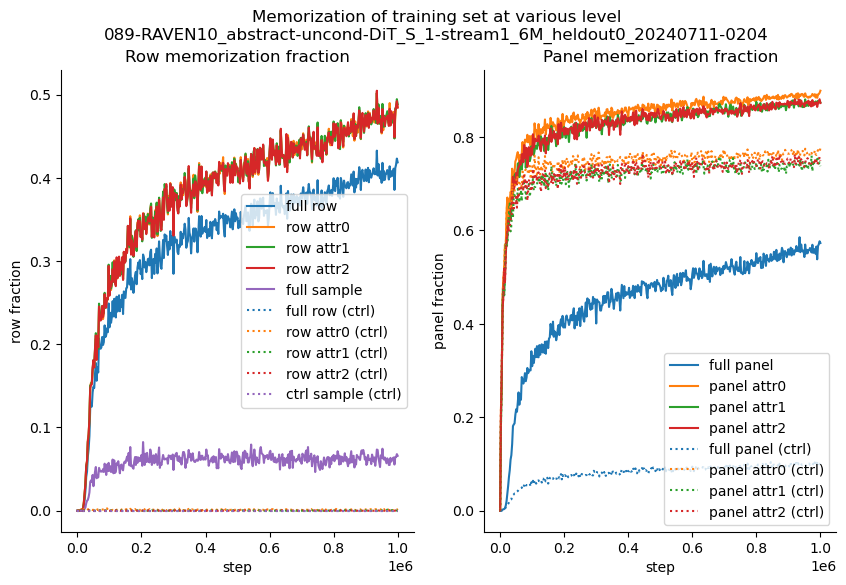

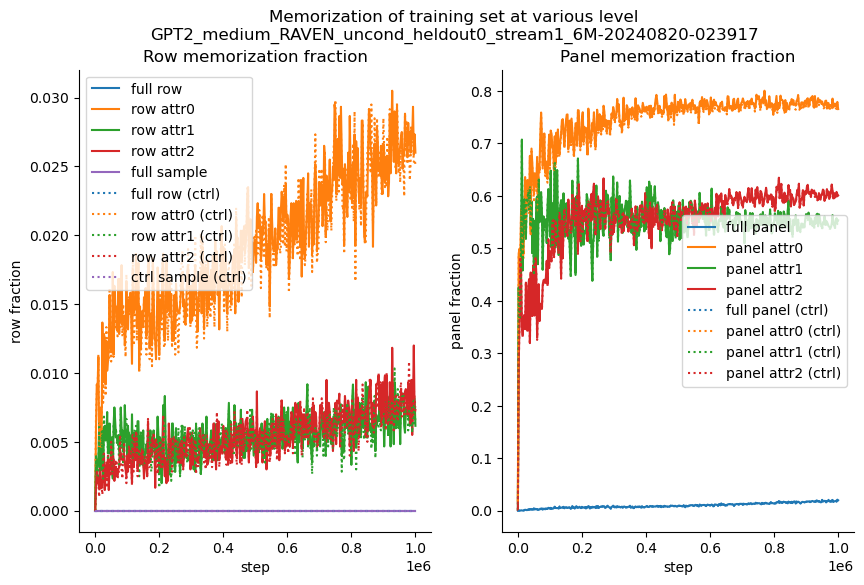

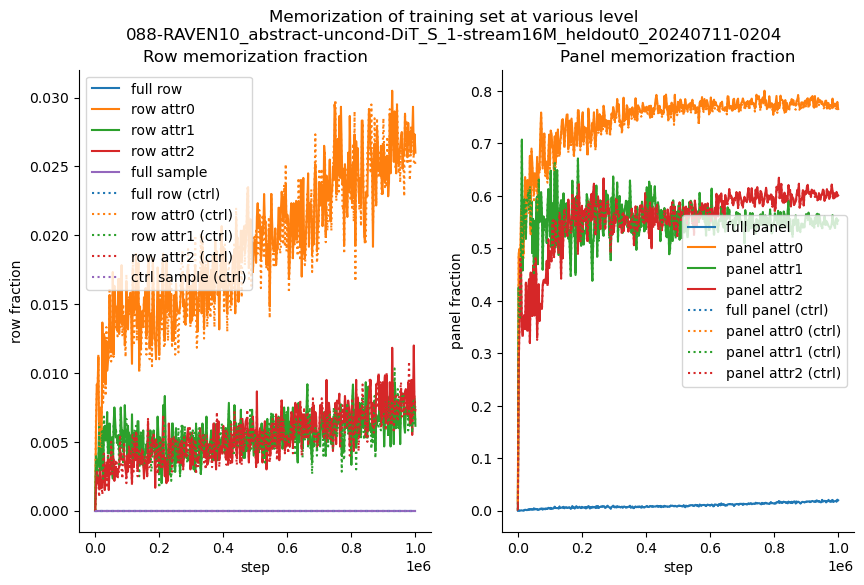

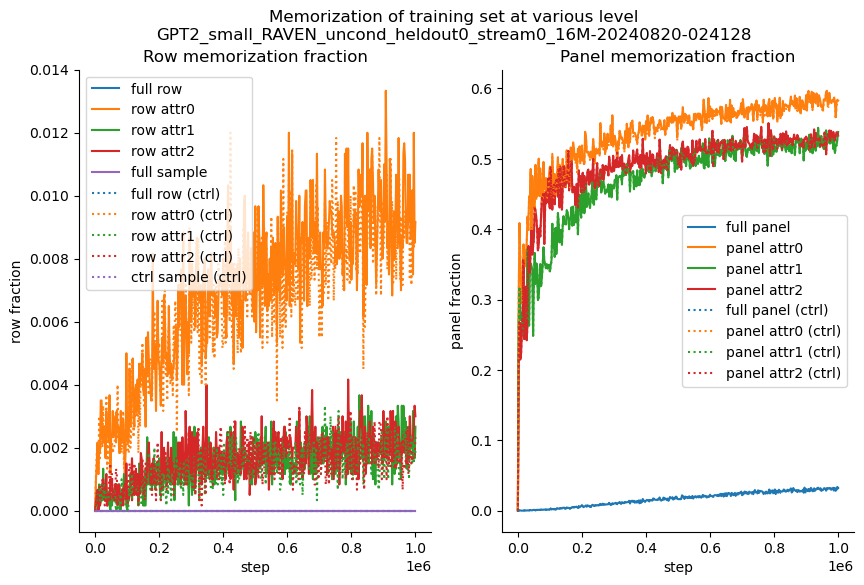

In [47]:
# Define the root directory
# Iterate through all subdirectories and files
for figexpdir, _, files in os.walk(GPTmemroot):
    # Get the experiment name
    expname = os.path.basename(figexpdir)
    try:
        mem_stats_df = pd.read_csv(join(figexpdir, "memorization_stats_train_set.csv"))
        mem_stats_ctrl_df = pd.read_csv(join(figexpdir, "memorization_stats_ctrl_set.csv"), index_col=0)
    except FileExistsError:
        print(f"Skipping {expname}")
        continue
    figh = visualize_memorization_with_ctrl_dynamics(mem_stats_df, mem_stats_ctrl_df, expname=expname)
    saveallforms(figexpdir, "memorization_dynamics_train_set_ctrl_set", figh)

### Statistics synopsis for GPT

In [17]:
# Define the root directory
# Iterate through all subdirectories and files
mem_syn_col = {}
for figexpdir, _, files in os.walk(GPTmemroot):
    # Get the experiment name
    expname = os.path.basename(figexpdir)
    for file in files:
        if file.endswith('train_set.csv'):
            file_path = os.path.join(figexpdir, file)
            # Read the CSV file
            mem_stats_df = pd.read_csv(file_path, index_col=0)
            last_epoch_stats = mem_stats_df.iloc[-10:].mean()
            # last_epoch_stats['expname'] = expname
            mem_syn_col[expname] = last_epoch_stats
            # Process the data as needed
        if file.endswith('ctrl_set.csv'):
            file_path = os.path.join(figexpdir, file)
            # Read the CSV file
            mem_stats_ctrl_df = pd.read_csv(file_path, index_col=0)
mem_syn_df = pd.DataFrame(mem_syn_col).T

In [21]:
# show columns containing the word "frac
mem_syn_df.loc[:, mem_syn_df.columns.str.contains('frac')]

mem_samplefrac  \
GPT2_base_RAVEN_uncond_heldout0_stream0_16M-202...         0.01345   
GPT2_small_RAVEN_uncond_heldout0_stream0_016M-2...         0.06455   
GPT2_medium_RAVEN_uncond_heldout0_stream0_16M-2...         0.04085   
GPT2_base_RAVEN_uncond_heldout0_stream1_6M-2024...         0.00000   
GPT2_small_RAVEN_uncond_heldout0_stream1_6M-202...         0.00000   
GPT2_medium_RAVEN_uncond_heldout0_stream0_016M-...         0.06190   
GPT2_base_RAVEN_uncond_heldout0_stream0_016M-20...         0.06295   
GPT2_medium_RAVEN_uncond_heldout0_stream1_6M-20...         0.00000   
GPT2_small_RAVEN_uncond_heldout0_stream0_16M-20...         0.00000   

                                                    mem_rowfrac  mem_panfrac  \
GPT2_base_RAVEN_uncond_heldout0_stream0_16M-202...     0.033833     0.102767   
GPT2_small_RAVEN_uncond_heldout0_stream0_016M-2...     0.318067     0.429328   
GPT2_medium_RAVEN_uncond_heldout0_stream0_16M-2...     0.148583     0.268028   
GPT2_base_RAVEN_uncond_heldout0_stream1_6M-2024...     0.000000     0.009761   
GPT2_small_RAVEN_uncond_heldout0_stream1_6M-202...     0.000000     0.006122   
GPT2_medium_RAVEN_uncond_heldout0_stream0_016M-...     0.407183     0.610800   
GPT2_base_RAVEN_uncond_heldout0_stream0_016M-20...     0.408333     0.560922   
GPT2_medium_RAVEN_uncond_heldout0_stream1_6M-20...     0.000000     0.018728   
GPT2_small_RAVEN_uncond_heldout0_stream0_16M-20...     0.000000     0.031233   

                                                    mem_attr0_rowfrac  \
GPT2_base_RAVEN_uncond_heldout0_stream0_16M-202...           0.054317   
GPT2_small_RAVEN_uncond_heldout0_stream0_016M-2...           0.376400   
GPT2_medium_RAVEN_uncond_heldout0_stream0_16M-2...           0.184383   
GPT2_base_RAVEN_uncond_heldout0_stream1_6M-2024...           0.017650   
GPT2_small_RAVEN_uncond_heldout0_stream1_6M-202...           0.017917   
GPT2_medium_RAVEN_uncond_heldout0_stream0_016M-...           0.470483   
GPT2_base_RAVEN_uncond_heldout0_stream0_016M-20...           0.474267   
GPT2_medium_RAVEN_uncond_heldout0_stream1_6M-20...           0.027167   
GPT2_small_RAVEN_uncond_heldout0_stream0_16M-20...           0.009533   

                                                    mem_attr0_panfrac  \
GPT2_base_RAVEN_uncond_heldout0_stream0_16M-202...           0.667828   
GPT2_small_RAVEN_uncond_heldout0_stream0_016M-2...           0.819744   
GPT2_medium_RAVEN_uncond_heldout0_stream0_16M-2...           0.771244   
GPT2_base_RAVEN_uncond_heldout0_stream1_6M-2024...           0.761094   
GPT2_small_RAVEN_uncond_heldout0_stream1_6M-202...           0.750794   
GPT2_medium_RAVEN_uncond_heldout0_stream0_016M-...           0.912156   
GPT2_base_RAVEN_uncond_heldout0_stream0_016M-20...           0.890100   
GPT2_medium_RAVEN_uncond_heldout0_stream1_6M-20...           0.772994   
GPT2_small_RAVEN_uncond_heldout0_stream0_16M-20...           0.580083   

                                                    mem_attr1_rowfrac  \
GPT2_base_RAVEN_uncond_heldout0_stream0_16M-202...           0.044267   
GPT2_small_RAVEN_uncond_heldout0_stream0_016M-2...           0.373383   
GPT2_medium_RAVEN_uncond_heldout0_stream0_16M-2...           0.180817   
GPT2_base_RAVEN_uncond_heldout0_stream1_6M-2024...           0.005483   
GPT2_small_RAVEN_uncond_heldout0_stream1_6M-202...           0.005117   
GPT2_medium_RAVEN_uncond_heldout0_stream0_016M-...           0.471750   
GPT2_base_RAVEN_uncond_heldout0_stream0_016M-20...           0.475367   
GPT2_medium_RAVEN_uncond_heldout0_stream1_6M-20...           0.007350   
GPT2_small_RAVEN_uncond_heldout0_stream0_16M-20...           0.002333   

                                                    mem_attr1_panfrac  \
GPT2_base_RAVEN_uncond_heldout0_stream0_16M-202...           0.612600   
GPT2_small_RAVEN_uncond_heldout0_stream0_016M-2...           0.794072   
GPT2_medium_RAVEN_uncond_heldout0_stream0_16M-2...           0.688056   
GPT2_base_RAVEN_uncond_heldout0_stream1_6M-2024...           0.63

In [34]:

mem_syn_df.loc["GPT2_medium_RAVEN_uncond_heldout0_stream0_16M-20240820-024019", mem_syn_df.columns.str.contains('frac')]

mem_samplefrac       0.040850
mem_rowfrac          0.148583
mem_panfrac          0.268028
mem_attr0_rowfrac    0.184383
mem_attr0_panfrac    0.771244
mem_attr1_rowfrac    0.180817
mem_attr1_panfrac    0.688056
mem_attr2_rowfrac    0.175800
mem_attr2_panfrac    0.675278
Name: GPT2_medium_RAVEN_uncond_heldout0_stream0_16M-20240820-024019, dtype: float64

In [16]:
# average the last 10 rows


epoch                988749.000000
C3                      286.400000
C2                      286.400000
valid                  2664.200000
total                  2000.000000
mem_samplecnt             0.000000
mem_samplefrac            0.000000
mem_rowcnt                0.000000
mem_rowfrac               0.000000
mem_pancnt              562.200000
mem_panfrac               0.031233
mem_attr0_rowcnt         57.200000
mem_attr0_rowfrac         0.009533
mem_attr0_pancnt      10441.500000
mem_attr0_panfrac         0.580083
mem_attr1_rowcnt         14.000000
mem_attr1_rowfrac         0.002333
mem_attr1_pancnt       9432.600000
mem_attr1_panfrac         0.524033
mem_attr2_rowcnt         14.500000
mem_attr2_rowfrac         0.002417
mem_attr2_pancnt       9604.100000
mem_attr2_panfrac         0.533561
dtype: float64

## DiT

In [16]:
figroot = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Figures/DiffusionReasoning/memorization_dynamics"
tabdir = "/n/home12/binxuwang/Github/DiffusionReasoning/Tables"
GPT_exproot = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/GPT2_raven"
DiT_exproot = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiT/results"
SSM_exproot = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/Mamba_raven"
EDM_exproot = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/mini_edm/exps"

syndf_DiT = pd.read_csv(join(tabdir, "DiT_raven_tensorboard_data_last10.csv"), index_col=0)
tb_data_col_DiT = pkl.load(open(join(tabdir, "DiT_raven_tensorboard_raw_data.pkl"), "rb"))

In [5]:
success_syndf = syndf_DiT.query("step > 900000")
success_syndf

Loss/average  Loss/batch  \
run_name                                                             
085-uncond-DiT_S_1-stream0_16M                0.094250    0.093119   
086-uncond-DiT_S_1-stream1_6M                 0.094534    0.094586   
087-uncond-DiT_S_1-stream16M                  0.094520    0.095650   
088-uncond-DiT_S_1-stream16M_heldout0         0.095964    0.096755   
089-uncond-DiT_S_1-stream1_6M_heldout0        0.096124    0.097144   
090-uncond-DiT_S_1-stream0_16M_heldout0       0.095820    0.097285   
091-uncond-DiT_B_1-stream16M                  0.094528    0.095505   
092-uncond-DiT_B_1-stream1_6M                 0.094594    0.092389   
093-uncond-DiT_B_1-stream1_6M_heldout0        0.095826    0.096923   
094-uncond-DiT_B_1-stream0_16M_heldout0       0.094084    0.093128   
095-uncond-DiT_B_1-stream16M_heldout0         0.095992    0.096585   
096-uncond-DiT_B_1-stream0_16M                0.093529    0.093393   
097-uncond-DiT_S_1-stream0_016M               0.039140    0.040803   
098-uncond-DiT_S_1-stream0_016M_heldout0      0.035150    0.037058   
101-uncond-DiT_B_1-stream0_016M_heldout0      0.021564    0.022078   
102-uncond-DiT_B_1-stream0_016M               0.022521    0.023305   

                                          Rules/anyvalid  Rules/anyvalid_cnt  \
run_name                                                                       
085-uncond-DiT_S_1-stream0_16M                  0.753874              4631.8   
086-uncond-DiT_S_1-stream1_6M                   0.767692              4716.7   
087-uncond-DiT_S_1-stream16M                    0.782910              4810.2   
088-uncond-DiT_S_1-stream16M_heldout0           0.768522              4721.8   
089-uncond-DiT_S_1-stream1_6M_heldout0          0.759196              4664.5   
090-uncond-DiT_S_1-stream0_16M_heldout0         0.747510              4592.7   
091-uncond-DiT_B_1-stream16M                    0.789095              4848.2   
092-uncond-DiT_B_1-stream1_6M                   0.777067              4774.3   
093-uncond-DiT_B_1-stream1_6M_heldout0          0.783219              4812.1   
094-uncond-DiT_B_1-stream0_16M_heldout0         0.758219              4658.5   
095-uncond-DiT_B_1-stream16M_heldout0           0.775879              4767.0   
096-uncond-DiT_B_1-stream0_16M                  0.764779              4698.8   
097-uncond-DiT_S_1-stream0_016M                 0.428206              2630.9   
098-uncond-DiT_S_1-stream0_016M_heldout0        0.414632              2547.5   
101-uncond-DiT_B_1-stream0_016M_heldout0        0.396436              2435.7   
102-uncond-DiT_B_1-stream0_016M                 0.437695              2689.2   

                                          Rules/c2  Rules/c2_cnt  Rules/c3  \
run_name                                                                     
085-uncond-DiT_S_1-stream0_16M            0.122949         251.8  0.602930   
086-uncond-DiT_S_1-stream1_6M             0.135107         276.7  0.613086   
087-uncond-DiT_S_1-stream16M              0.130811         267.9  0.631982   
088-uncond-DiT_S_1-stream16M_heldout0     0.125732         257.5  0.619727   
089-uncond-DiT_S_1-stream1_6M_heldout0    0.135449         277.4  0.602393   
090-uncond-DiT_S_1-stream0_16M_heldout0   0.134717         275.9  0.585352   
091-uncond-DiT_B_1-stream16M              0.122607         251.1  0.646924   
092-uncond-DiT_B_1-stream1_6M             0.121289         248.4  0.638916   
093-uncond-DiT_B_1-stream1_6M_heldout0    0.128613         263.4  0.638379   
094-uncond-DiT_B_1-stream0_16M_heldout0   0.143604         294.1  0.589893   
095-uncond-DiT_B_1-stream16M_heldout0     0.129053         264.3  0.626514   
096-uncond-DiT_B_1-stream0_16M            0.131592         269.5  0.611182   
097-uncond-DiT_S_1-stream0_016M           0.090918         186.2  0.018896   
098-uncond-DiT_S_1-stream0_016M_heldout0  0.061719         126.4  0.003857   
101-uncond-DiT_B_1-stream0_016M_heldout0  0.068457         140.2  0.032422   
102-uncond-DiT

In [6]:
success_syndf.loc["090-uncond-DiT_S_1-stream0_16M_heldout0"].full_name

'090-RAVEN10_abstract-uncond-DiT_S_1-stream0_16M_heldout0_20240711-0204/tensorboard_logs'

090-RAVEN10_abstract-uncond-DiT_S_1-stream0_16M_heldout0_20240711-0204/tensorboard_logs
Extracted data from /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiT/results/090-RAVEN10_abstract-uncond-DiT_S_1-stream0_16M_heldout0_20240711-0204/samples
example file: 0155000.pt


  0%|          | 0/401 [00:00<?, ?it/s]

Extracted data from /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiT/results/090-RAVEN10_abstract-uncond-DiT_S_1-stream0_16M_heldout0_20240711-0204/samples
example file: ['0155000.pt', '0422500.pt', '0432500.pt', '0715000.pt', '0787500.pt', '0072500.pt', '0277500.pt', 'sample_rule_eval_465000.pt', 'sample_rule_eval_602500.pt', '0707500.pt']


  0%|          | 0/401 [00:00<?, ?it/s]

examples_per_rule: 4000


  0%|          | 0/401 [00:00<?, ?it/s]

       epoch    C3   C2  valid  total  mem_samplecnt  mem_samplefrac  \
396   990000  1181  286   4552   2048              0             0.0   
397   992500  1243  276   4704   2048              0             0.0   
398   995000  1244  255   4723   2048              0             0.0   
399   997500  1240  273   4695   2048              0             0.0   
400  1000000  1170  291   4514   2048              0             0.0   

     mem_rowcnt  mem_rowfrac  mem_pancnt  ...  mem_attr0_pancnt  \
396           0          0.0        6752  ...             13771   
397           0          0.0        6536  ...             14113   
398           0          0.0        6409  ...             13756   
399           0          0.0        6670  ...             13770   
400           0          0.0        6017  ...             13513   

     mem_attr0_panfrac  mem_attr1_rowcnt  mem_attr1_rowfrac  mem_attr1_pancnt  \
396           0.747125                11           0.001790             13712   
39

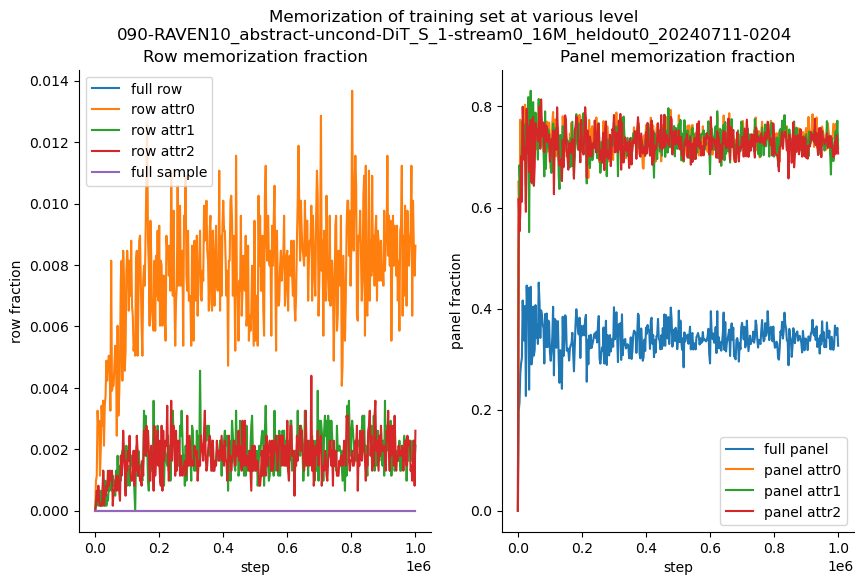

name 'heldout_ids' is not defined
Not enough control set, skip
samples in control set: 4000


NameError: name 'ctrl_X_sample_set' is not defined

In [30]:
# %%
success_syndf = syndf_DiT.query("step > 900000")
# expfullname = 'GPT2_medium_RAVEN_uncond_heldout0_stream0_16M-20240820-024019/tensorboard_logs'
# for expfullname in success_syndf.full_name.values:
expfullname = '090-RAVEN10_abstract-uncond-DiT_S_1-stream0_16M_heldout0_20240711-0204/tensorboard_logs'
print(expfullname)
expname = expfullname.split("/tensorboard_logs")[0]
figexpdir = join(figroot, expname)
os.makedirs(figexpdir, exist_ok=True)

prefix = "sample_rule_eval_" #"eval_step" if "stream" in expname else "eval_epoch"
eval_col = sweep_collect_eval_data(expname, DiT_exproot, prefix=prefix)
sample_col = sweep_collect_sample(expname, DiT_exproot, non_prefix=prefix)
dataset_size = extract_and_convert(expname)
examples_per_rule = int(dataset_size * 1E6 / 40)
print(f"examples_per_rule: {examples_per_rule}")
if examples_per_rule > 100000:
    raise ValueError("Too many examples per rule")

train_tsr_X, train_tsr_y = get_RAVEN_dataset(n_classes=40, cmb_per_class=examples_per_rule, heldout_ids=(), cmb_offset=0, cache=True)
train_X_sample_set, train_X_row_set, train_X_panel_set, train_X_row_set_attr_col, train_X_panel_set_attr_col = extract_training_set_row_panel_sets(train_tsr_X)
mem_stats_df = compute_memorization_tab_through_training(sample_col, eval_col, train_X_sample_set, train_X_row_set, train_X_panel_set, train_X_row_set_attr_col, train_X_panel_set_attr_col, abinit=True)
mem_stats_df.to_csv(join(figexpdir, "memorization_stats_train_set.csv"))
print(mem_stats_df.tail(5))
figh = visualize_memorization_dynamics(mem_stats_df, expname=expname)
saveallforms(figexpdir, "memorization_dynamics_train_set", figh)

try:
    ctrl_tsr_X, ctrl_tsr_y = get_RAVEN_dataset(n_classes=40, cmb_per_class=examples_per_rule, heldout_ids=(), cmb_offset=20000, cache=True)
    ctrl_X_sample_set, ctrl_X_row_set, ctrl_X_panel_set, ctrl_X_row_set_attr_col, ctrl_X_panel_set_attr_col = extract_training_set_row_panel_sets(ctrl_tsr_X)
except Exception as e:
    print(e)
    print("Not enough control set, skip")
    print("samples in control set:", examples_per_rule)   
    # continue
    raise Exception("stop here")
mem_stats_ctrl_df = compute_memorization_tab_through_training(sample_col, eval_col, ctrl_X_sample_set, ctrl_X_row_set, ctrl_X_panel_set, ctrl_X_row_set_attr_col, ctrl_X_panel_set_attr_col, abinit=True)
mem_stats_ctrl_df.to_csv(join(figexpdir, "memorization_stats_ctrl_set.csv"))
print(mem_stats_ctrl_df.tail(5))
figh2 = visualize_memorization_dynamics(mem_stats_ctrl_df, expname=expname+' Control set')
saveallforms(figexpdir, "memorization_dynamics_ctrl_set", figh2)

  0%|          | 0/401 [00:00<?, ?it/s]

       epoch    C3   C2  valid  total  mem_samplecnt  mem_samplefrac  \
396   990000  1181  286   4552   2048              0             0.0   
397   992500  1243  276   4704   2048              0             0.0   
398   995000  1244  255   4723   2048              0             0.0   
399   997500  1240  273   4695   2048              0             0.0   
400  1000000  1170  291   4514   2048              0             0.0   

     mem_rowcnt  mem_rowfrac  mem_pancnt  ...  mem_attr0_pancnt  \
396           0          0.0        6683  ...             13761   
397           0          0.0        6476  ...             14136   
398           0          0.0        6405  ...             13738   
399           0          0.0        6650  ...             13775   
400           0          0.0        6025  ...             13516   

     mem_attr0_panfrac  mem_attr1_rowcnt  mem_attr1_rowfrac  mem_attr1_pancnt  \
396           0.746582                 8           0.001302             13706   
39

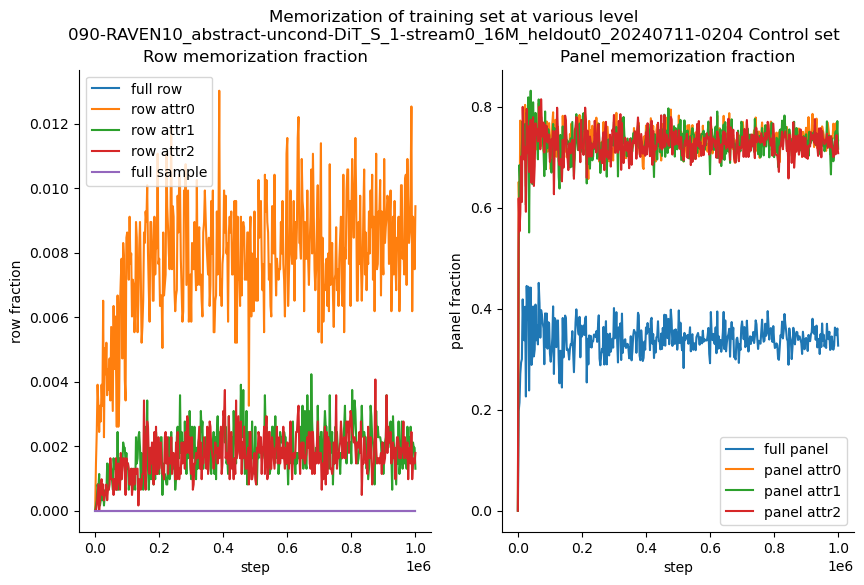

In [31]:

try:
    ctrl_tsr_X, ctrl_tsr_y = get_RAVEN_dataset(n_classes=40, cmb_per_class=examples_per_rule, heldout_ids=(), cmb_offset=20000, cache=True)
    ctrl_X_sample_set, ctrl_X_row_set, ctrl_X_panel_set, ctrl_X_row_set_attr_col, ctrl_X_panel_set_attr_col = extract_training_set_row_panel_sets(ctrl_tsr_X)
except Exception as e:
    print(e)
    print("Not enough control set, skip")
    print("samples in control set:", examples_per_rule)   
    # continue
mem_stats_ctrl_df = compute_memorization_tab_through_training(sample_col, eval_col, ctrl_X_sample_set, ctrl_X_row_set, ctrl_X_panel_set, ctrl_X_row_set_attr_col, ctrl_X_panel_set_attr_col, abinit=True)
mem_stats_ctrl_df.to_csv(join(figexpdir, "memorization_stats_ctrl_set.csv"))
print(mem_stats_ctrl_df.tail(5))
figh2 = visualize_memorization_dynamics(mem_stats_ctrl_df, expname=expname+' Control set')
saveallforms(figexpdir, "memorization_dynamics_ctrl_set", figh2)

In [32]:
sum_df = mem_stats_df.tail(10).mean()

In [33]:
# show only columns containing the word "frac"
sum_df.loc[sum_df.index.str.contains('frac')]

mem_samplefrac       0.000000
mem_rowfrac          0.000000
mem_panfrac          0.339773
mem_attr0_rowfrac    0.008724
mem_attr0_panfrac    0.747792
mem_attr1_rowfrac    0.002002
mem_attr1_panfrac    0.723758
mem_attr2_rowfrac    0.001774
mem_attr2_panfrac    0.719537
dtype: float64

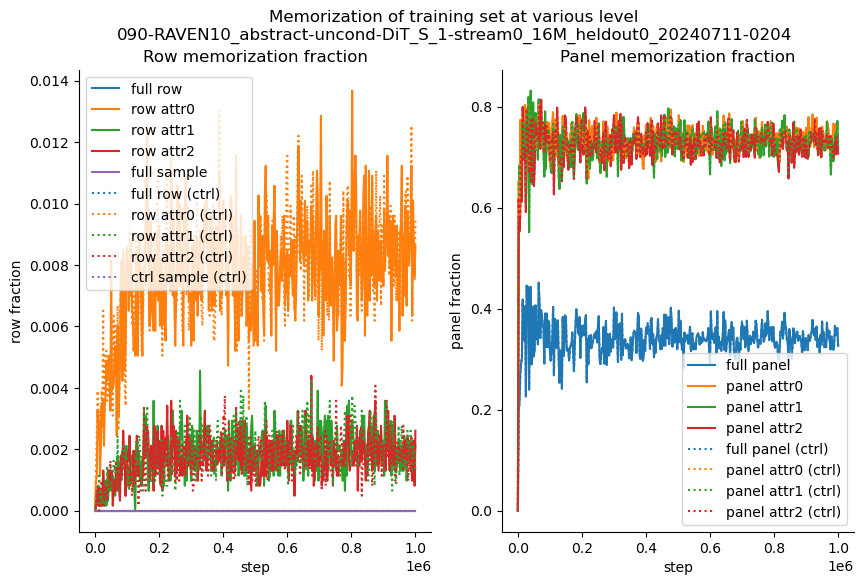

In [46]:
figh = visualize_memorization_with_ctrl_dynamics(mem_stats_df, mem_stats_ctrl_df, expname=expname)
saveallforms(figexpdir, "memorization_dynamics_train_ctrl_set_combined", figh)

## Run through models

In [9]:
syndf_diff = pd.read_csv(join(tabdir, "diffusion_family_comb_tensorboard_data_last10.csv"), index_col=0)    

In [12]:
syndf_diff.query("step > 900000 and model_class == 'DiT' and dataset_size == 0.016 and heldout == True")

Learning Rate  Loss/average  \
run_name                                                                
098-uncond-DiT_S_1-stream0_016M_heldout0            NaN      0.035150   
101-uncond-DiT_B_1-stream0_016M_heldout0            NaN      0.021564   

                                          Loss/batch  Rules/anyvalid  \
run_name                                                               
098-uncond-DiT_S_1-stream0_016M_heldout0    0.037058        0.414632   
101-uncond-DiT_B_1-stream0_016M_heldout0    0.022078        0.396436   

                                          Rules/anyvalid_cnt  Rules/c2  \
run_name                                                                 
098-uncond-DiT_S_1-stream0_016M_heldout0              2547.5  0.061719   
101-uncond-DiT_B_1-stream0_016M_heldout0              2435.7  0.068457   

                                          Rules/c2_cnt  Rules/c3  \
run_name                                                           
098-uncond-DiT_S_1-stream0_016M_heldout0         126.4  0.003857   
101-uncond-DiT_B_1-stream0_016M_heldout0         140.2  0.032422   

                                          Rules/c3_cnt  \
run_name                                                 
098-uncond-DiT_S_1-stream0_016M_heldout0           7.9   
101-uncond-DiT_B_1-stream0_016M_heldout0          66.4   

                                                                                  full_name  \
run_name                                                                                      
098-uncond-DiT_S_1-stream0_016M_heldout0  098-RAVEN10_abstract-uncond-DiT_S_1-stream0_01...   
101-uncond-DiT_B_1-stream0_016M_heldout0  101-RAVEN10_abstract-uncond-DiT_B_1-stream0_01...   

                                          ...  Rules/c23_cnt    scale  \
run_name                                  ...                           
098-uncond-DiT_S_1-stream0_016M_heldout0  ...          134.3  DiT-S/1   
101-uncond-DiT_B_1-stream0_016M_heldout0  ...          206.6  DiT-B/1   

                                           c3_CI_L   c3_CI_H  c23_CI_L  \
run_name                                                                 
098-uncond-DiT_S_1-stream0_016M_heldout0  0.003027  0.004736  0.062207   
101-uncond-DiT_B_1-stream0_016M_heldout0  0.030029  0.034863  0.096777   

                                          c23_CI_H   c2_CI_L   c2_CI_H  \
run_name                                                                 
098-uncond-DiT_S_1-stream0_016M_heldout0  0.068994  0.058447  0.065039   
101-uncond-DiT_B_1-stream0_016M_heldout0  0.105029  0.065039  0.071924   

                                          valid_CI_L  valid_CI_H  
run_name                                                          
098-uncond-DiT_S_1-stream0_016M_heldout0    0.410742    0.418522  
101-uncond-DiT_B_1-stream0_016M_heldout0    0.392562    0.400309  

[2 rows x 37 columns]

098-RAVEN10_abstract-uncond-DiT_S_1-stream0_016M_heldout0_20240816-0050/tensorboard_logs
Extracted data from /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiT/results/098-RAVEN10_abstract-uncond-DiT_S_1-stream0_016M_heldout0_20240816-0050/samples
example file: 0155000.pt


  0%|          | 0/401 [00:00<?, ?it/s]

Extracted data from /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiT/results/098-RAVEN10_abstract-uncond-DiT_S_1-stream0_016M_heldout0_20240816-0050/samples
example file: ['0155000.pt', '0422500.pt', '0432500.pt', '0715000.pt', '0787500.pt', '0072500.pt', '0277500.pt', 'sample_rule_eval_465000.pt', 'sample_rule_eval_602500.pt', '0707500.pt']


  0%|          | 0/401 [00:00<?, ?it/s]

examples_per_rule: 400


  0%|          | 0/401 [00:00<?, ?it/s]

       epoch  C3   C2  valid  total  mem_samplecnt  mem_samplefrac  \
396   990000   9  122   2522   2048              0             0.0   
397   992500   4  124   2501   2048              0             0.0   
398   995000   8  107   2407   2048              0             0.0   
399   997500  15  121   2533   2048              0             0.0   
400  1000000   5  128   2610   2048              0             0.0   

     mem_rowcnt  mem_rowfrac  mem_pancnt  ...  mem_attr0_pancnt  \
396           0     0.000000        1242  ...              8658   
397           2     0.000326        1425  ...              9480   
398           0     0.000000        1221  ...              8170   
399           0     0.000000        1386  ...              8930   
400           0     0.000000        1326  ...              8689   

     mem_attr0_panfrac  mem_attr1_rowcnt  mem_attr1_rowfrac  mem_attr1_pancnt  \
396           0.469727                 3           0.000488              9309   
397           

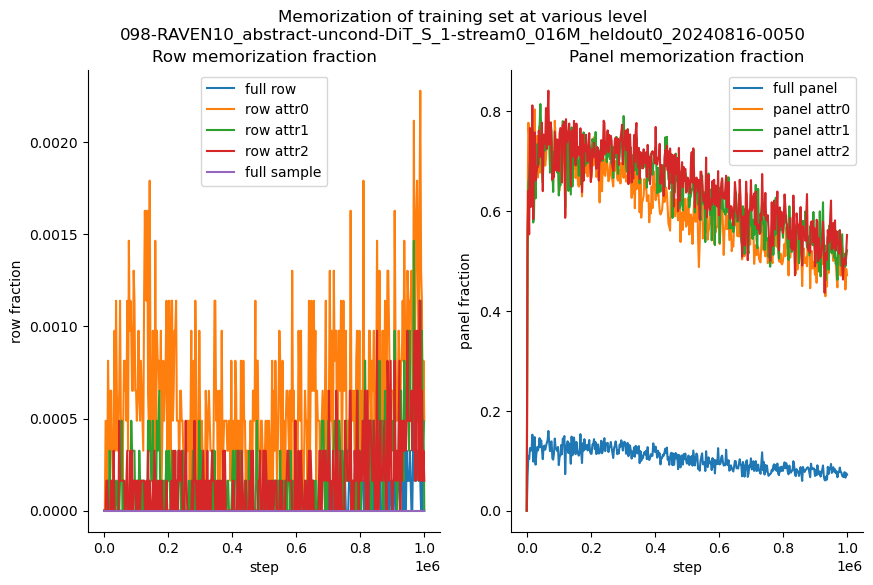

  0%|          | 0/401 [00:00<?, ?it/s]

       epoch  C3   C2  valid  total  mem_samplecnt  mem_samplefrac  \
396   990000   9  122   2522   2048              0             0.0   
397   992500   4  124   2501   2048              0             0.0   
398   995000   8  107   2407   2048              0             0.0   
399   997500  15  121   2533   2048              0             0.0   
400  1000000   5  128   2610   2048              0             0.0   

     mem_rowcnt  mem_rowfrac  mem_pancnt  ...  mem_attr0_pancnt  \
396           0          0.0        1226  ...              8639   
397           0          0.0        1390  ...              9466   
398           0          0.0        1152  ...              8151   
399           0          0.0        1314  ...              8932   
400           0          0.0        1361  ...              8715   

     mem_attr0_panfrac  mem_attr1_rowcnt  mem_attr1_rowfrac  mem_attr1_pancnt  \
396           0.468696                 1           0.000163              9289   
397           

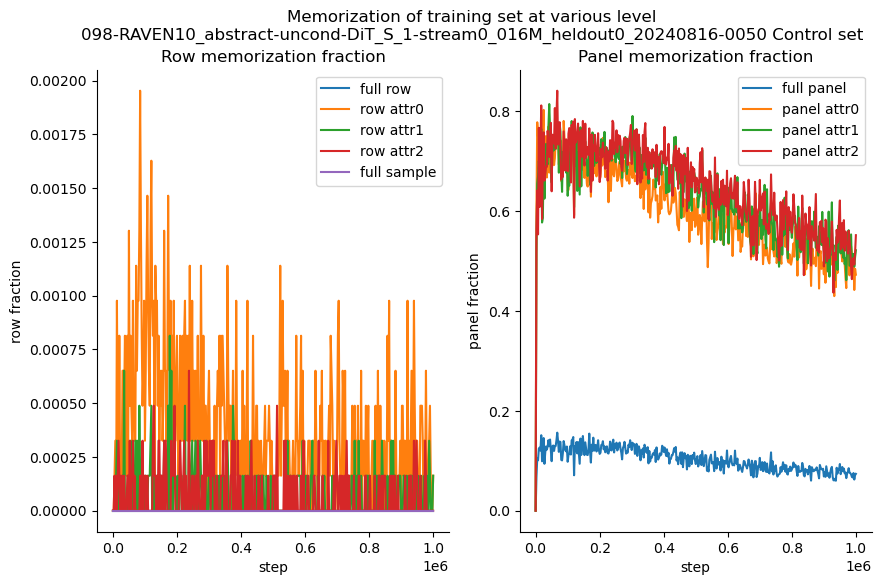

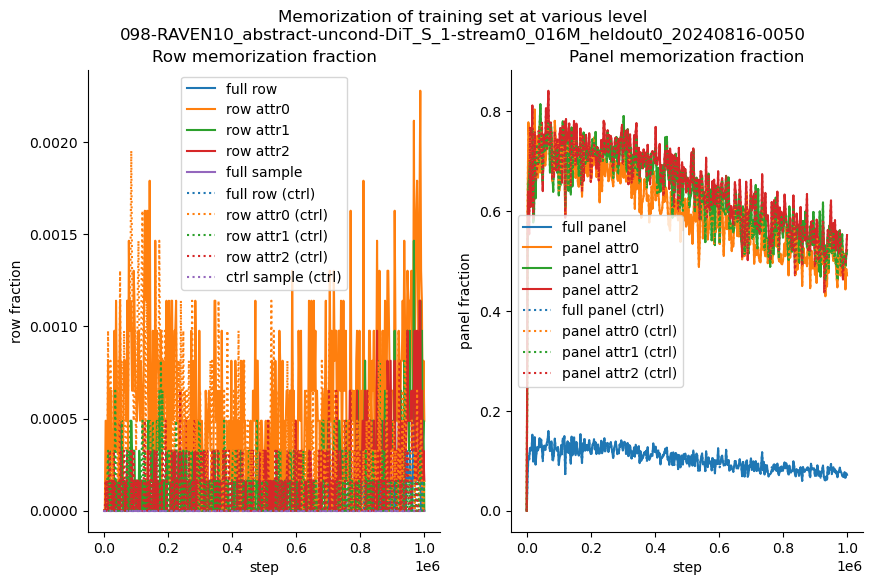

101-RAVEN10_abstract-uncond-DiT_B_1-stream0_016M_heldout0_20240921-1650/tensorboard_logs
Extracted data from /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiT/results/101-RAVEN10_abstract-uncond-DiT_B_1-stream0_016M_heldout0_20240921-1650/samples
example file: 0155000.pt


  0%|          | 0/401 [00:00<?, ?it/s]

Extracted data from /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiT/results/101-RAVEN10_abstract-uncond-DiT_B_1-stream0_016M_heldout0_20240921-1650/samples
example file: ['0155000.pt', '0422500.pt', '0432500.pt', '0715000.pt', '0787500.pt', '0072500.pt', '0277500.pt', 'sample_rule_eval_465000.pt', 'sample_rule_eval_602500.pt', '0707500.pt']


  0%|          | 0/401 [00:00<?, ?it/s]

examples_per_rule: 400


  0%|          | 0/401 [00:00<?, ?it/s]

       epoch  C3   C2  valid  total  mem_samplecnt  mem_samplefrac  \
396   990000  62  132   2475   2048             12        0.005859   
397   992500  68  144   2422   2048             16        0.007812   
398   995000  54  162   2501   2048             18        0.008789   
399   997500  70  125   2360   2048             14        0.006836   
400  1000000  78  131   2412   2048             31        0.015137   

     mem_rowcnt  mem_rowfrac  mem_pancnt  ...  mem_attr0_pancnt  \
396         105     0.017090        1545  ...              7420   
397         161     0.026204        1805  ...              7765   
398         150     0.024414        1939  ...              8403   
399         160     0.026042        1601  ...              7964   
400         194     0.031576        2025  ...              8552   

     mem_attr0_panfrac  mem_attr1_rowcnt  mem_attr1_rowfrac  mem_attr1_pancnt  \
396           0.402561               200           0.032552              6496   
397           

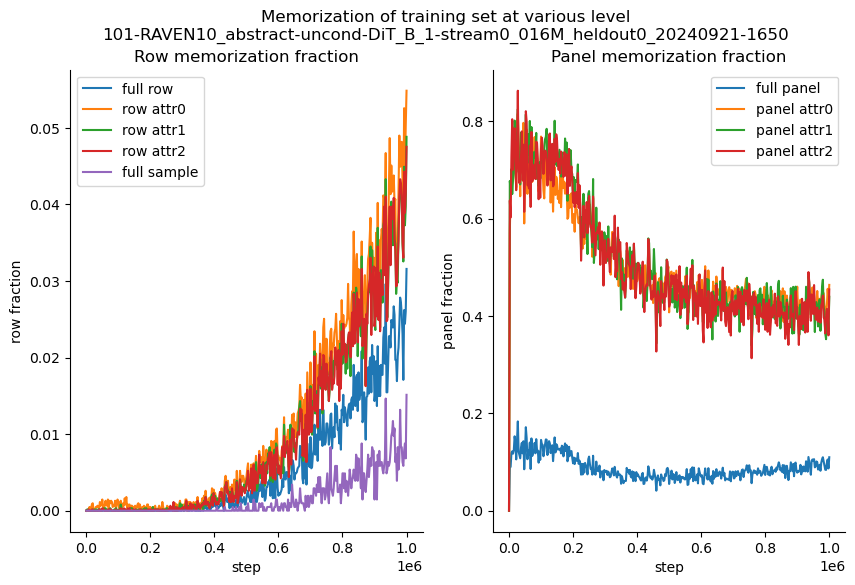

  0%|          | 0/401 [00:00<?, ?it/s]

       epoch  C3   C2  valid  total  mem_samplecnt  mem_samplefrac  \
396   990000  62  132   2475   2048              0             0.0   
397   992500  68  144   2422   2048              0             0.0   
398   995000  54  162   2501   2048              0             0.0   
399   997500  70  125   2360   2048              0             0.0   
400  1000000  78  131   2412   2048              0             0.0   

     mem_rowcnt  mem_rowfrac  mem_pancnt  ...  mem_attr0_pancnt  \
396           0          0.0         979  ...              7246   
397           0          0.0        1070  ...              7494   
398           0          0.0        1284  ...              8259   
399           0          0.0         920  ...              7779   
400           0          0.0        1242  ...              8346   

     mem_attr0_panfrac  mem_attr1_rowcnt  mem_attr1_rowfrac  mem_attr1_pancnt  \
396           0.393121                 0           0.000000              6326   
397           

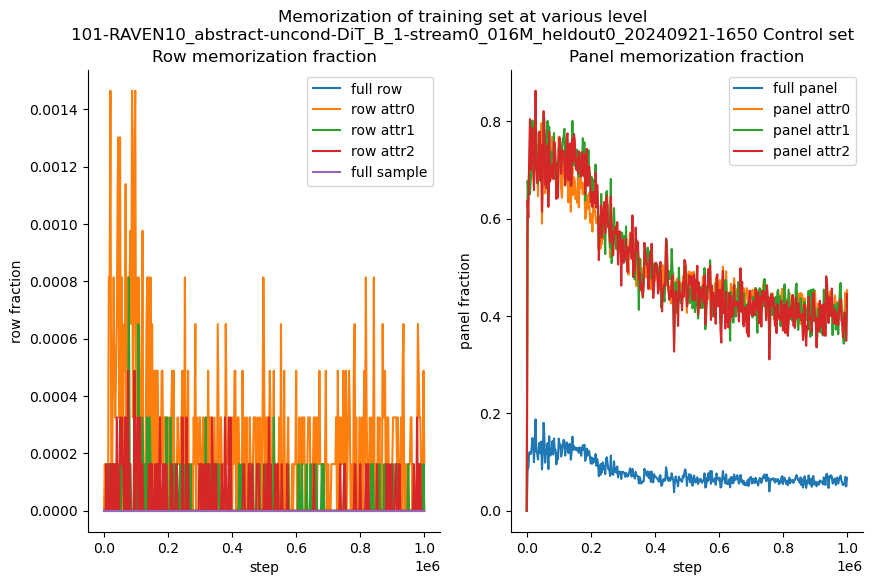

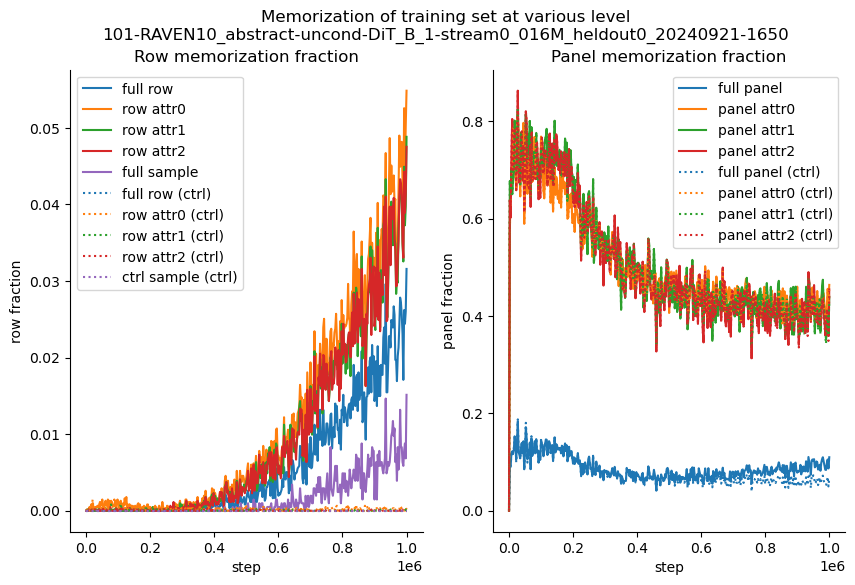

In [13]:
# %%
partial_syndf = syndf_diff.query("step > 900000 and model_class == 'DiT' and dataset_size == 0.016 and heldout == True")
# expfullname = 'GPT2_medium_RAVEN_uncond_heldout0_stream0_16M-20240820-024019/tensorboard_logs'
# for expfullname in success_syndf.full_name.values:
# expfullname = '090-RAVEN10_abstract-uncond-DiT_S_1-stream0_16M_heldout0_20240711-0204/tensorboard_logs'
for expfullname in partial_syndf.full_name.values:
    print(expfullname)
    expname = expfullname.split("/tensorboard_logs")[0]
    figexpdir = join(figroot, expname)
    os.makedirs(figexpdir, exist_ok=True)
    prefix = "sample_rule_eval_" #"eval_step" if "stream" in expname else "eval_epoch"
    eval_col = sweep_collect_eval_data(expname, DiT_exproot, prefix=prefix)
    sample_col = sweep_collect_sample(expname, DiT_exproot, non_prefix=prefix)
    dataset_size = extract_and_convert(expname)
    examples_per_rule = int(dataset_size * 1E6 / 40)
    print(f"examples_per_rule: {examples_per_rule}")
    if examples_per_rule > 45000:
        raise ValueError("Too many examples per rule")

    train_tsr_X, train_tsr_y = get_RAVEN_dataset(n_classes=40, cmb_per_class=examples_per_rule, heldout_ids=(), cmb_offset=0, cache=True)
    train_X_sample_set, train_X_row_set, train_X_panel_set, train_X_row_set_attr_col, train_X_panel_set_attr_col = extract_training_set_row_panel_sets(train_tsr_X)
    mem_stats_df = compute_memorization_tab_through_training(sample_col, eval_col, train_X_sample_set, train_X_row_set, train_X_panel_set, train_X_row_set_attr_col, train_X_panel_set_attr_col, abinit=True)
    mem_stats_df.to_csv(join(figexpdir, "memorization_stats_train_set.csv"))
    print(mem_stats_df.tail(5))
    figh = visualize_memorization_dynamics(mem_stats_df, expname=expname)
    saveallforms(figexpdir, "memorization_dynamics_train_set", figh)

    try:
        ctrl_tsr_X, ctrl_tsr_y = get_RAVEN_dataset(n_classes=40, cmb_per_class=examples_per_rule, heldout_ids=(), cmb_offset=45000, cache=True)
        ctrl_X_sample_set, ctrl_X_row_set, ctrl_X_panel_set, ctrl_X_row_set_attr_col, ctrl_X_panel_set_attr_col = extract_training_set_row_panel_sets(ctrl_tsr_X)
    except Exception as e:
        print(e)
        print("Not enough control set, skip")
        print("samples in control set:", examples_per_rule)   
        # continue
        raise Exception("stop here")
    mem_stats_ctrl_df = compute_memorization_tab_through_training(sample_col, eval_col, ctrl_X_sample_set, ctrl_X_row_set, ctrl_X_panel_set, ctrl_X_row_set_attr_col, ctrl_X_panel_set_attr_col, abinit=True)
    mem_stats_ctrl_df.to_csv(join(figexpdir, "memorization_stats_ctrl_set.csv"))
    print(mem_stats_ctrl_df.tail(5))
    figh2 = visualize_memorization_dynamics(mem_stats_ctrl_df, expname=expname+' Control set')
    saveallforms(figexpdir, "memorization_dynamics_ctrl_set", figh2)

    figh3 = visualize_memorization_with_ctrl_dynamics(mem_stats_df, mem_stats_ctrl_df, expname=expname)
    saveallforms(figexpdir, "memorization_dynamics_train_ctrl_set_combined", figh3)

In [23]:
syndf_diff.query("step > 900000 and dataset_size == 0.16 and heldout == True and model_class == 'EDM'").full_name.values

array(['BaseBlnrX3_new_stream0_16M_heldout0_RAVEN10_abstract_20240921-2218/tensorboard_logs',
       'BigBlnrX3_new_stream0_16M_heldout0_RAVEN10_abstract_20240708-2308/tensorboard_logs',
       'BigBlnrX3_new_stream0_16M_heldout0_RAVEN10_abstract_20240709-1249/tensorboard_logs',
       'WideBlnrX3_new_stream0_16M_heldout0_RAVEN10_abstract_20240708-2054/tensorboard_logs'],
      dtype=object)

In [ ]:
EDM_exproot

In [24]:
!ls {EDM_exproot}/BaseBlnrX3_new_stream0_16M_heldout0_RAVEN10_abstract_20240921-2218/samples

sample_rule_eval_0.pt	    sample_rule_eval_70000.pt	tensor_40000.pt
sample_rule_eval_100000.pt  sample_rule_eval_702500.pt	tensor_402500.pt
sample_rule_eval_10000.pt   sample_rule_eval_705000.pt	tensor_405000.pt
sample_rule_eval_102500.pt  sample_rule_eval_707500.pt	tensor_407500.pt
sample_rule_eval_105000.pt  sample_rule_eval_710000.pt	tensor_410000.pt
sample_rule_eval_107500.pt  sample_rule_eval_712500.pt	tensor_412500.pt
sample_rule_eval_110000.pt  sample_rule_eval_715000.pt	tensor_415000.pt
sample_rule_eval_112500.pt  sample_rule_eval_717500.pt	tensor_417500.pt
sample_rule_eval_115000.pt  sample_rule_eval_720000.pt	tensor_420000.pt
sample_rule_eval_117500.pt  sample_rule_eval_722500.pt	tensor_422500.pt
sample_rule_eval_120000.pt  sample_rule_eval_725000.pt	tensor_425000.pt
sample_rule_eval_122500.pt  sample_rule_eval_72500.pt	tensor_42500.pt
sample_rule_eval_125000.pt  sample_rule_eval_727500.pt	tensor_427500.pt
sample_rule_eval_12500.pt   sample_rule_eval_730000.pt	tensor_430000.p